Group 42 data wrangling file description ot be updated

In [19]:
# Imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Pipeline Constants
rolling_average = 3
figsize = (8, 6)
anchor = 'upper right'
ylim = [-0.1,0.175]
economy = 'World' # Keep in mind that ylim may have to be adjusted if the economy is changed

Importing GDP Data

In [21]:
GDP_path = "./data/US_GDPTotal_20230802051908.csv"
gdp = pd.read_csv(GDP_path)
gdp.head()

,Year,Economy,Economy Label,US dollars at current prices in millions,US dollars at current prices in millions Footnote,US dollars at current prices in millions Missing value,US dollars at current prices per capita,US dollars at current prices per capita Footnote,US dollars at current prices per capita Missing value,US dollars at constant prices (2015) in millions,US dollars at constant prices (2015) in millions Footnote,US dollars at constant prices (2015) in millions Missing value,US dollars at constant prices (2015) per capita,US dollars at constant prices (2015) per capita Footnote,US dollars at constant prices (2015) per capita Missing value
0,1970,1,Individual economies,NaN,NaN,Not applicable,NaN,NaN,Not applicable,NaN,NaN,Not applicable,NaN,NaN,Not applicable
1,1970,4,Afghanistan,1731.436,NaN,NaN,161.019,NaN,NaN,10467.590,NaN,NaN,973.460,NaN,NaN
2,1970,8,Albania,2265.577,NaN,NaN,974.554,NaN,NaN,3159.176,NaN,NaN,1358.943,NaN,NaN
3,1970,12,Algeria,5155.121,NaN,NaN,373.670,NaN,NaN,34858.472,NaN,NaN,2526.724,NaN,NaN
4,1970,20,Andorra,99.477,NaN,NaN,5008.902,NaN,NaN,895.861,NaN,NaN,45108.826,NaN,NaN


In [22]:
# fraction of nans in the entire set
gdp.isna().sum().sum() / gdp.size

0.5332820282605443

In [23]:
# Drop the redundant columns
for i in gdp.columns:
    if 'Footnote' in i or 'Missing value' in i or '2015' in i:
        gdp = gdp.drop(i, axis=1) 

gdp.head()

gdp.to_csv('./tables/GDP_cleaned.csv', index=False)

In [24]:
# count the nans in each column
gdp.isna().sum()

Year                                           0
Economy                                        0
Economy Label                                  0
US dollars at current prices in millions    1438
US dollars at current prices per capita     1458
dtype: int64

In [25]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15593 entries, 0 to 15592
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      15593 non-null  int64  
 1   Economy                                   15593 non-null  int64  
 2   Economy Label                             15593 non-null  object 
 3   US dollars at current prices in millions  14155 non-null  float64
 4   US dollars at current prices per capita   14135 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 609.2+ KB


In [26]:
gdp.to_csv('./tables/GDP_final.csv', index=False)
gdp.head()

,Year,Economy,Economy Label,US dollars at current prices in millions,US dollars at current prices per capita
0,1970,1,Individual economies,NaN,NaN
1,1970,4,Afghanistan,1731.436,161.019
2,1970,8,Albania,2265.577,974.554
3,1970,12,Algeria,5155.121,373.670
4,1970,20,Andorra,99.477,5008.902


Importing Maratime data 

In [27]:
# Import Ship data here. 
data = "./data/US_MerchantFleet_20230704052924.csv"
marine_data = pd.read_csv(data)
# print(marine_data.columns)
print(marine_data.head())



   Year Economy         Economy Label  ShipType   ShipType Label  \
0  1980    0001  Individual economies         0      Total fleet   
1  1980    0001  Individual economies         1      Oil tankers   
2  1980    0001  Individual economies         2    Bulk carriers   
3  1980    0001  Individual economies         3    General cargo   
4  1980    0001  Individual economies         4  Container ships   

   Dead weight tons in thousands  Dead weight tons in thousands Footnote  \
0                            NaN                                     NaN   
1                            NaN                                     NaN   
2                            NaN                                     NaN   
3                            NaN                                     NaN   
4                            NaN                                     NaN   

  Dead weight tons in thousands Missing value  Percentage of total world  \
0                              Not applicable             

In [28]:
marine_data.isna().sum().sum()

# percentage of null values in entire dataset
marine_data.isna().sum().sum()/(marine_data.shape[0]*marine_data.shape[1])

0.5217391304347826

In [29]:
# remove coloumms from marine data
marine_data.drop(['Percentage of total world', 'Percentage of total world Footnote', 'Percentage of total world Missing value', 'Percentage of total fleet','Percentage of total fleet Footnote',  'Percentage of total fleet Missing value','Number of ships Footnote','Number of ships Missing value','Average age of vessels (years) Footnote',
       'Average age of vessels (years) Missing value','Gross Tonnage in thousands Missing value','Gross Tonnage in thousands Footnote'], axis=1, inplace=True)
# print(marine_data.columns)
display(marine_data.head(20))

,Year,Economy,Economy Label,ShipType,ShipType Label,Dead weight tons in thousands,Dead weight tons in thousands Footnote,Dead weight tons in thousands Missing value,Number of ships,Gross Tonnage in thousands,Average age of vessels (years)
0,1980,0001,Individual economies,0,Total fleet,NaN,NaN,Not applicable,NaN,NaN,NaN
1,1980,0001,Individual economies,1,Oil tankers,NaN,NaN,Not applicable,NaN,NaN,NaN
2,1980,0001,Individual economies,2,Bulk carriers,NaN,NaN,Not applicable,NaN,NaN,NaN
3,1980,0001,Individual economies,3,General cargo,NaN,NaN,Not applicable,NaN,NaN,NaN
4,1980,0001,Individual economies,4,Container ships,NaN,NaN,Not applicable,NaN,NaN,NaN
5,1980,0001,Individual economies,5,Other types of ships,NaN,NaN,Not applicable,NaN,NaN,NaN
6,1980,008,Albania,0,Total fleet,78.949,NaN,NaN,NaN,NaN,NaN
7,1980,008,Albania,3,General cargo,78.949,NaN,NaN,NaN,NaN,NaN
8,1980,012,Algeria,0,Total fleet,1872.119,NaN,NaN,NaN,NaN,NaN
9,1980,012,Algeria,1,Oil tankers,1177.697,NaN,NaN,NaN,NaN,NaN


In [30]:
# Ship types 0 = all, 1 = Oil tankers, 2 = Bulk ,3 general cargo,  4 = container, 5 = other


deadweight_per_year_global_fleet = marine_data['Dead weight tons in thousands'].loc[marine_data['ShipType']==0].loc[marine_data['Economy Label']== economy]
deadweight_per_year_global_fleet_tankers = marine_data['Dead weight tons in thousands'].loc[marine_data['ShipType']==1].loc[marine_data['Economy Label']== economy]
deadweight_per_year_global_fleet_bulk = marine_data['Dead weight tons in thousands'].loc[marine_data['ShipType']==2].loc[marine_data['Economy Label']== economy]
deadweight_per_year_global_fleet_general_cargo = marine_data['Dead weight tons in thousands'].loc[marine_data['ShipType']==3].loc[marine_data['Economy Label']== economy]
deadweight_per_year_global_fleet_container = marine_data['Dead weight tons in thousands'].loc[marine_data['ShipType']==4].loc[marine_data['Economy Label']== economy]
deadweight_per_year_global_fleet_other = marine_data['Dead weight tons in thousands'].loc[marine_data['ShipType']==5].loc[marine_data['Economy Label']== economy]
Years = marine_data['Year'].loc[marine_data['Economy Label']== economy]

# Unprocessed deadweight_per_year, doing it for each type in both the rows and columns
deadweight_per_year = pd.DataFrame({"Year": Years, "Deadweight All Types": deadweight_per_year_global_fleet, "Deadweight Tankers": deadweight_per_year_global_fleet_tankers, "Deadweight Bulk": deadweight_per_year_global_fleet_bulk, "Deadweight General Cargo": deadweight_per_year_global_fleet_general_cargo, "Deadweight Container": deadweight_per_year_global_fleet_container, "Deadweight Other": deadweight_per_year_global_fleet_other})
display(deadweight_per_year)

deadweight_per_year.to_csv("./tables/Deadweight_per_year.csv")



,Year,Deadweight All Types,Deadweight Tankers,Deadweight Bulk,Deadweight General Cargo,Deadweight Container,Deadweight Other
845,1980,672142.488,NaN,NaN,NaN,NaN,NaN
846,1980,NaN,337895.557,NaN,NaN,NaN,NaN
847,1980,NaN,NaN,181880.282,NaN,NaN,NaN
848,1980,NaN,NaN,NaN,112840.897,NaN,NaN
849,1980,NaN,NaN,NaN,NaN,10290.114,NaN
...,...,...,...,...,...,...,...
57578,2023,NaN,651348.458,NaN,NaN,NaN,NaN
57579,2023,NaN,NaN,973742.566,NaN,NaN,NaN
57580,2023,NaN,NaN,NaN,81814.697,NaN,NaN
57581,2023,NaN,NaN,NaN,NaN,305312.825,NaN


In [31]:
# Processed data grouping them all together, no change in numbers

deadweight_per_year.fillna(0, inplace=True)
deadweight_per_year= deadweight_per_year.groupby('Year').sum()
display(deadweight_per_year)
deadweight_per_year.to_csv("./tables/Deadweight_per_year_processed.csv")

,Deadweight All Types,Deadweight Tankers,Deadweight Bulk,Deadweight General Cargo,Deadweight Container,Deadweight Other
Year,,,,,,
1980,672142.488,337895.557,181880.282,112840.897,10290.114,29235.638
1981,679704.794,338616.336,184501.243,114832.851,11060.523,30693.841
1982,686028.910,334237.813,193217.208,113293.837,12108.264,33171.788
1983,690093.141,323668.186,204630.713,113269.092,12809.767,35715.383
1984,681538.852,304466.296,212915.210,111863.049,14088.790,38205.507
1985,668140.139,284945.860,218518.136,108308.363,17266.770,39101.010
1986,654327.406,258932.401,227550.780,103920.992,18732.552,45190.681
1987,632237.783,238144.528,226967.377,100221.979,20180.653,46723.246
1988,625045.766,234908.375,223659.130,97110.251,21489.531,47878.480


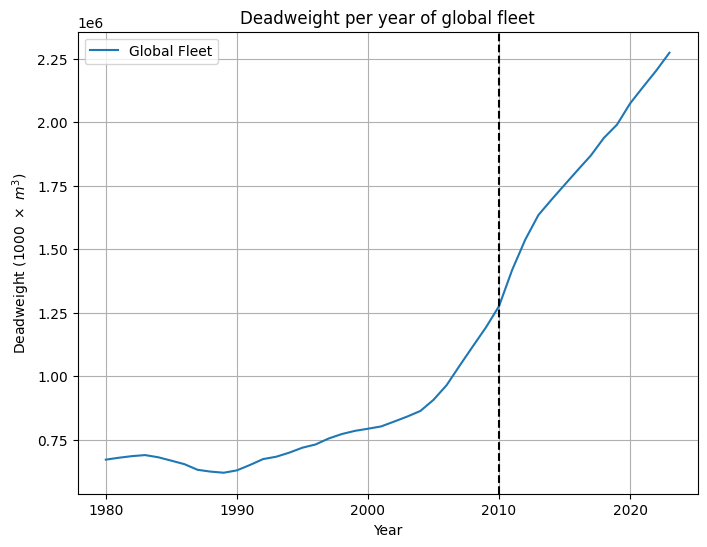

In [32]:
plt.figure(figsize=figsize)
plt.plot(deadweight_per_year['Deadweight All Types'])
plt.axvline(x=2010, color='k', linestyle='--')
plt.title("Deadweight per year of global fleet")
plt.xlabel('Year')
plt.ylabel('Deadweight ($1000\ \\times\ m^3$)')
plt.legend(['Global Fleet'])
plt.grid()
plt.show()

Putting the data together 

In [33]:
Global_GDP = gdp[gdp['Economy Label'] == economy]
print(Global_GDP.head())

      Year  Economy Economy Label  US dollars at current prices in millions  \
231   1970        0         World                               3421043.067   
524   1971        0         World                               3764796.928   
817   1972        0         World                               4332728.349   
1110  1973        0         World                               5272010.505   
1403  1974        0         World                               5972891.026   

      US dollars at current prices per capita  
231                                   925.726  
524                                   998.532  
817                                  1126.817  
1110                                 1344.761  
1403                                 1494.825  


FileNotFoundError: [Errno 2] No such file or directory: './Graphs/GDP_Deadweight(total)_over_time.png'

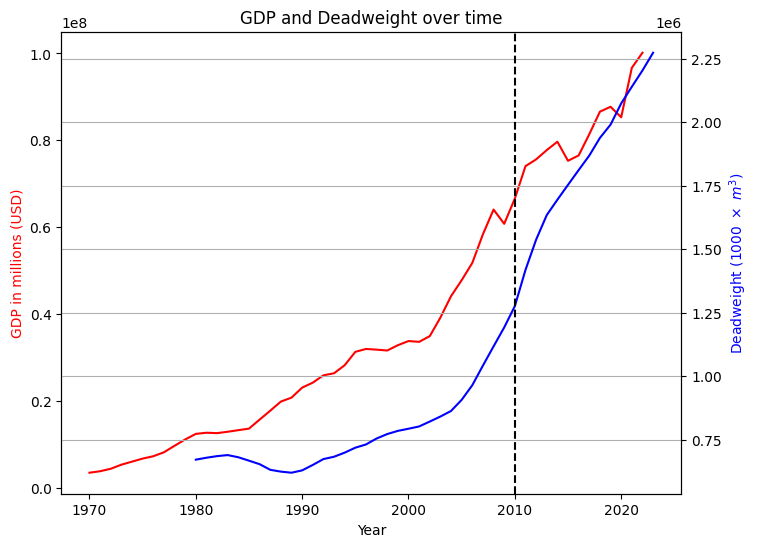

In [34]:

# plot on two separat accesis
fig, ax1 = plt.subplots(figsize=figsize)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP in millions (USD)', color='red')
ax1.plot(Global_GDP['Year'], Global_GDP['US dollars at current prices in millions'], color='red')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Deadweight ($1000\ \\times\ m^3$)',color='blue')  # we already handled the x-label with ax1
ax2.plot(deadweight_per_year.index, deadweight_per_year['Deadweight All Types'], color='blue')
ax2.tick_params(axis='y')
plt.title('GDP and Deadweight over time')
plt.grid()
plt.axvline(x=2010, color='k', linestyle='--')

plt.savefig('./Graphs/GDP_Deadweight(total)_over_time.png')
plt.show()


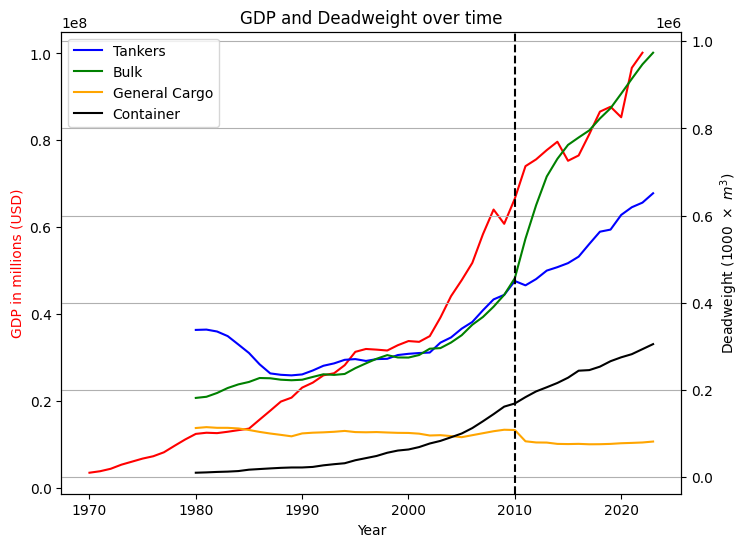

In [ ]:
# second acess should be class 1-5
fig, ax1 = plt.subplots(figsize=figsize)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP in millions (USD)', color='red')
ax1.plot(Global_GDP['Year'], Global_GDP['US dollars at current prices in millions'], color='red')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Deadweight ($1000\ \\times\ m^3$)')  # we already handled the x-label with ax1
ax2.plot(deadweight_per_year.index, deadweight_per_year['Deadweight Tankers'], color='blue')
ax2.plot(deadweight_per_year.index, deadweight_per_year['Deadweight Bulk'], color='green')
ax2.plot(deadweight_per_year.index, deadweight_per_year['Deadweight General Cargo'], color='orange')
ax2.plot(deadweight_per_year.index, deadweight_per_year['Deadweight Container'], color='black')
# ax2.plot(deadweight_per_year.index, deadweight_per_year['Deadweight Other'], color='purple')
ax2.tick_params(axis='y')
plt.title('GDP and Deadweight over time')
plt.legend([ 'Tankers', 'Bulk', 'General Cargo', 'Container'])
plt.axvline(x=2010, color='k', linestyle='--')
plt.grid()
plt.savefig('./Graphs/GDP_Deadweight_over_time.png')
plt.show()

Percentage changes year on year

,Year,US dollars at current prices in millions,Change in GDP
231,1970,3.421043e+06,NaN
524,1971,3.764797e+06,0.100482
817,1972,4.332728e+06,0.150853
1110,1973,5.272011e+06,0.216788
1403,1974,5.972891e+06,0.132944
1696,1975,6.679029e+06,0.118224
1989,1976,7.217477e+06,0.080618
2282,1977,8.125915e+06,0.125867
2575,1978,9.624973e+06,0.184479
2868,1979,1.107868e+07,0.151035


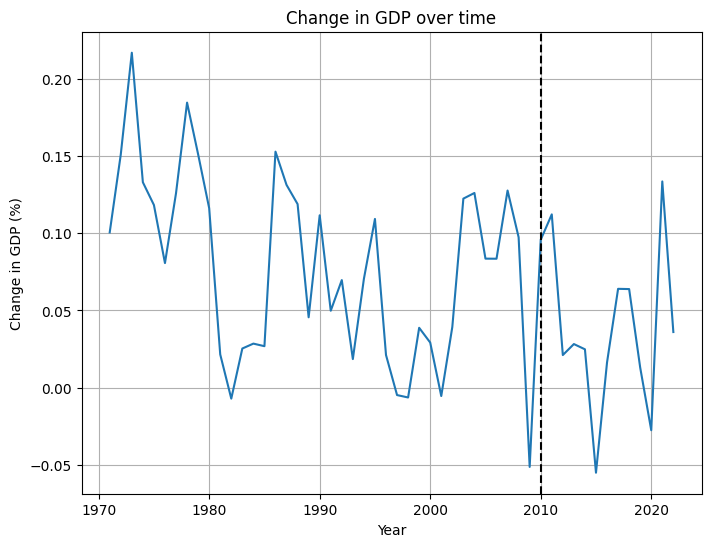

In [ ]:
change_in_gdp = pd.DataFrame(Global_GDP['Year'])
change_in_gdp['US dollars at current prices in millions'] = Global_GDP['US dollars at current prices in millions']
change_in_gdp['Change in GDP'] = change_in_gdp['US dollars at current prices in millions'].pct_change()
display(change_in_gdp)

change_in_gdp.to_csv('./tables/Change_in_GDP.csv', index=False)

plt.figure(figsize=figsize)
plt.plot(change_in_gdp['Year'], change_in_gdp['Change in GDP'])
plt.title('Change in GDP over time')
plt.xlabel('Year')
plt.ylabel('Change in GDP (%)')
plt.axvline(x=2010, color='k', linestyle='--')

plt.grid()

Persentage change of maratime capacity

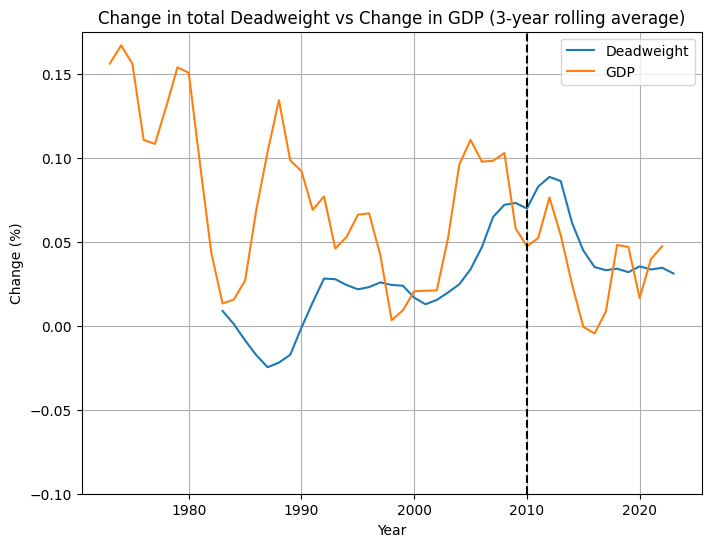

In [ ]:
deadweight_per_year['Change in Deadweight All types'] = deadweight_per_year['Deadweight All Types'].pct_change()
plt.figure(figsize=figsize)
plt.plot(deadweight_per_year.index, deadweight_per_year['Change in Deadweight All types'].rolling(rolling_average).mean())
plt.plot(change_in_gdp['Year'], change_in_gdp['Change in GDP'].rolling(rolling_average).mean())
plt.title('Change in total Deadweight vs Change in GDP (3-year rolling average)')
plt.xlabel('Year')
plt.ylabel('Change (%)')
plt.ylim(ylim)
plt.grid()
plt.legend(['Deadweight', 'GDP'])
plt.axvline(x=2010, color='k', linestyle='--')

plt.savefig('./Graphs/Change_in_total_Deadweight_vs_Change_in_GDP_(3-year_rolling_average).png', dpi=100)

plt.show()


Change in marine capacity v gdp individual ship types

In [ ]:
deadweight_per_year['Change in Deadweight Tankers'] = deadweight_per_year['Deadweight Tankers'].pct_change()
deadweight_per_year['Change in Deadweight Bulk'] = deadweight_per_year['Deadweight Bulk'].pct_change()
deadweight_per_year['Change in Deadweight General Cargo'] = deadweight_per_year['Deadweight General Cargo'].pct_change()
deadweight_per_year['Change in Deadweight Container'] = deadweight_per_year['Deadweight Container'].pct_change()
deadweight_per_year['Change in Deadweight Other'] = deadweight_per_year['Deadweight Other'].pct_change()
display(deadweight_per_year)


,Deadweight All Types,Deadweight Tankers,Deadweight Bulk,Deadweight General Cargo,Deadweight Container,Deadweight Other,Change in Deadweight All types,Change in Deadweight Tankers,Change in Deadweight Bulk,Change in Deadweight General Cargo,Change in Deadweight Container,Change in Deadweight Other
Year,,,,,,,,,,,,
1980,672142.488,337895.557,181880.282,112840.897,10290.114,29235.638,NaN,NaN,NaN,NaN,NaN,NaN
1981,679704.794,338616.336,184501.243,114832.851,11060.523,30693.841,0.011251,0.002133,0.014410,0.017653,0.074869,0.049878
1982,686028.910,334237.813,193217.208,113293.837,12108.264,33171.788,0.009304,-0.012931,0.047241,-0.013402,0.094728,0.080731
1983,690093.141,323668.186,204630.713,113269.092,12809.767,35715.383,0.005924,-0.031623,0.059071,-0.000218,0.057936,0.076679
1984,681538.852,304466.296,212915.210,111863.049,14088.790,38205.507,-0.012396,-0.059326,0.040485,-0.012413,0.099847,0.069721
1985,668140.139,284945.860,218518.136,108308.363,17266.770,39101.010,-0.019659,-0.064114,0.026315,-0.031777,0.225568,0.023439
1986,654327.406,258932.401,227550.780,103920.992,18732.552,45190.681,-0.020673,-0.091293,0.041336,-0.040508,0.084890,0.155742
1987,632237.783,238144.528,226967.377,100221.979,20180.653,46723.246,-0.033759,-0.080283,-0.002564,-0.035594,0.077304,0.033913
1988,625045.766,234908.375,223659.130,97110.251,21489.531,47878.480,-0.011375,-0.013589,-0.014576,-0.031048,0.064858,0.024725


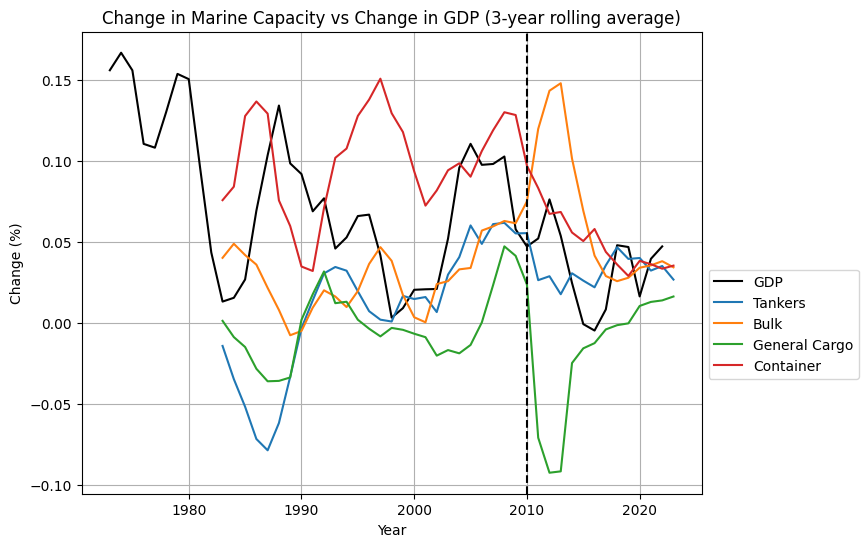

In [ ]:
plt.figure(figsize=figsize)
plt.plot(change_in_gdp['Year'], change_in_gdp['Change in GDP'].rolling(rolling_average).mean(), color='black')
plt.plot(deadweight_per_year.index, deadweight_per_year['Change in Deadweight Tankers'].rolling(rolling_average).mean())
plt.plot(deadweight_per_year.index, deadweight_per_year['Change in Deadweight Bulk'].rolling(rolling_average).mean())
plt.plot(deadweight_per_year.index, deadweight_per_year['Change in Deadweight General Cargo'].rolling(rolling_average).mean())
plt.plot(deadweight_per_year.index, deadweight_per_year['Change in Deadweight Container'].rolling(rolling_average).mean())
# plt.plot(change_in_marine_capacity.index, change_in_marine_capacity['Change in Deadweight Other'].rolling(rolling_average).mean())
plt.title(f'Change in Marine Capacity vs Change in GDP ({rolling_average}-year rolling average)')
plt.xlabel('Year')
plt.ylabel('Change (%)')
plt.grid()
plt.legend(["GDP", 'Tankers', 'Bulk', 'General Cargo', 'Container', 'Other'],  bbox_to_anchor=(1.0, 0.5))
plt.axvline(x=2010, color='k', linestyle='--')

plt.savefig('./Graphs/Change_in_Marine_Capacity_vs_Change_in_GDP_(3-year_rolling_average).png')

plt.show()

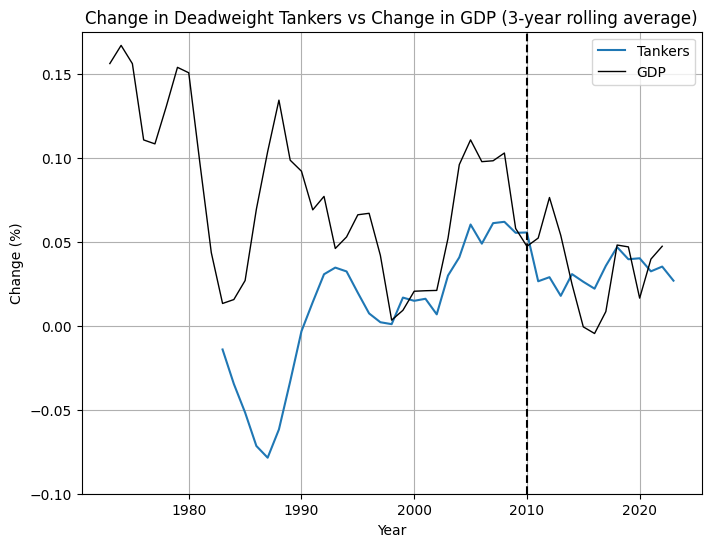

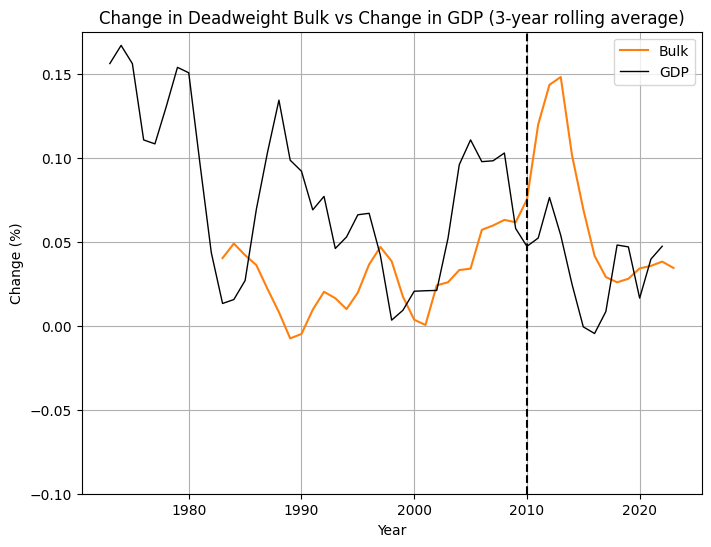

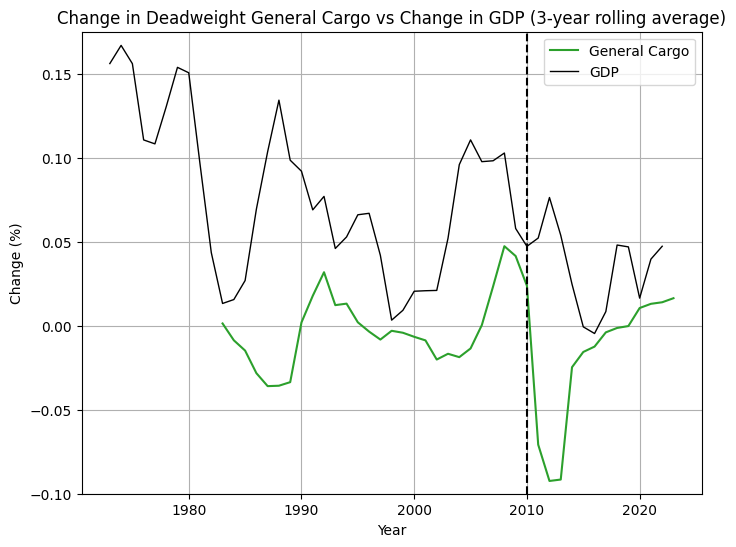

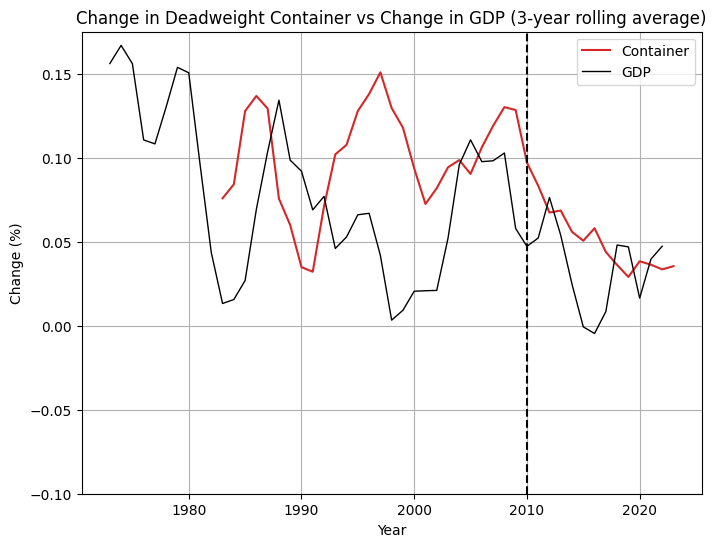

In [ ]:
figsize = (8, 6)
anchor = 'upper right'


plt.figure(figsize=figsize)

plt.plot(deadweight_per_year.index, deadweight_per_year['Change in Deadweight Tankers'].rolling(rolling_average).mean(), color='tab:blue')
plt.plot(change_in_gdp['Year'], change_in_gdp['Change in GDP'].rolling(rolling_average).mean(), color='black', linewidth=1)
plt.title(f'Change in Deadweight Tankers vs Change in GDP ({rolling_average}-year rolling average)')
plt.xlabel('Year')
plt.ylabel('Change (%)')
plt.grid()
plt.legend(['Tankers', 'GDP'], loc=anchor)
plt.ylim(ylim)
plt.axvline(x=2010, color='k', linestyle='--')
plt.savefig('./Graphs/Change_in_Deadweight_Tankers_vs_Change_in_GDP.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=figsize)

plt.plot(deadweight_per_year.index, deadweight_per_year['Change in Deadweight Bulk'].rolling(rolling_average).mean(), color='tab:orange')
plt.plot(change_in_gdp['Year'], change_in_gdp['Change in GDP'].rolling(rolling_average).mean(), color='black', linewidth=1)
plt.title(f'Change in Deadweight Bulk vs Change in GDP ({rolling_average}-year rolling average)')
plt.xlabel('Year')
plt.ylabel('Change (%)')
plt.grid()
plt.legend(['Bulk', 'GDP'], loc=anchor)
plt.ylim(ylim)
plt.axvline(x=2010, color='k', linestyle='--')
plt.savefig('./Graphs/Change_in_Deadweight_Bulk_vs_Change_in_GDP.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=figsize)

plt.plot(deadweight_per_year.index, deadweight_per_year['Change in Deadweight General Cargo'].rolling(rolling_average).mean(), color='tab:green')
plt.plot(change_in_gdp['Year'], change_in_gdp['Change in GDP'].rolling(rolling_average).mean(), color='black', linewidth=1)
plt.title(f'Change in Deadweight General Cargo vs Change in GDP ({rolling_average}-year rolling average)')
plt.xlabel('Year')
plt.ylabel('Change (%)')
plt.grid()
plt.legend(['General Cargo', 'GDP'], loc=anchor)
plt.ylim(ylim)
plt.axvline(x=2010, color='k', linestyle='--')
plt.savefig('./Graphs/Change_in_Deadweight_General_Cargo_vs_Change_in_GDP.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=figsize)

plt.plot(deadweight_per_year.index, deadweight_per_year['Change in Deadweight Container'].rolling(rolling_average).mean(), color='tab:red')
plt.plot(change_in_gdp['Year'], change_in_gdp['Change in GDP'].rolling(rolling_average).mean(), color='black', linewidth=1)
plt.title(f'Change in Deadweight Container vs Change in GDP ({rolling_average}-year rolling average)')
plt.xlabel('Year')
plt.ylabel('Change (%)')
plt.grid()
plt.legend(['Container', 'GDP'], loc=anchor)
plt.ylim(ylim)
plt.axvline(x=2010, color='k', linestyle='--')
plt.savefig('./Graphs/Change_in_Deadweight_Container_vs_Change_in_GDP.png', bbox_inches='tight')
plt.show()
